<a href="https://colab.research.google.com/github/pk2971/Air-Quality-time-series/blob/main/Air_Quality_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pollutants in the air often cause a rise in the temperature at any given time of the day. 
As the day progresses and the traffic increases during a certain time of the day there might be more pollutants in the air(for example during the morning rush hours or when everyone is going back to homes or during the factorys working hours). Our goal is to see if we can predict the amount of pollutants in the air, temperature by studying the patterns across different times.


In [2]:
import pandas as pd
import io

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
#from google.colab import files
#uploaded=files.upload()

In [7]:
df=pd.read_csv("/content/drive/MyDrive/AirQualityUCI.csv",sep=';',decimal='.',quoting=csv.QUOTE_NONE, skip_blank_lines=False)

In [8]:
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
df=df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [10]:
from datetime import datetime as dt
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S' ).dt.time
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [11]:
df['DateTime']=pd.to_datetime(df.Date.astype(str) + ' ' + df.Time.astype(str),errors='coerce')

In [12]:
df['CO(GT)']=df['CO(GT)'].str.replace(",",".")
df['CO(GT)']=df['CO(GT)'].astype(float)

In [13]:
df['C6H6(GT)']=df['C6H6(GT)'].str.replace(",",".")
df['C6H6(GT)']=df['C6H6(GT)'].astype(float)

In [14]:
df['T']=df['T'].str.replace(",",".")
df['T']=df['T'].astype(float)

In [15]:
df['RH']=df['RH'].str.replace(",",".")
df['RH']=df['RH'].astype(float)

In [16]:
df['AH']=df['AH'].str.replace(",",".")
df['AH']=df['AH'].astype(float)

In [17]:
df=df.dropna()

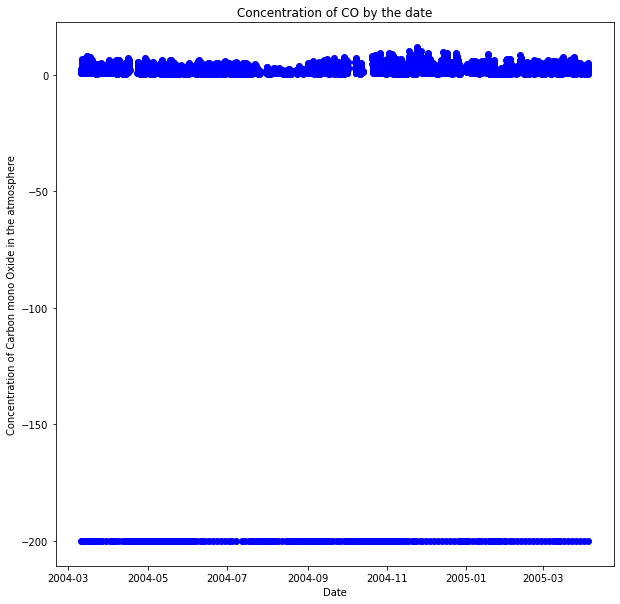

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['CO(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

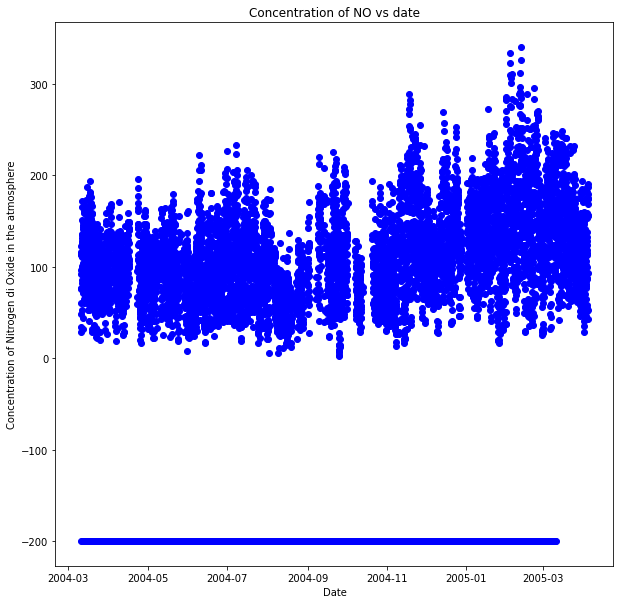

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['NO2(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Nitrogen di Oxide in the atmosphere",
       title="Concentration of NO vs date")

plt.show()

In [20]:
print((df['CO(GT)']==-200).sum())

1683


In [21]:
df=df[df['CO(GT)']!=-200]

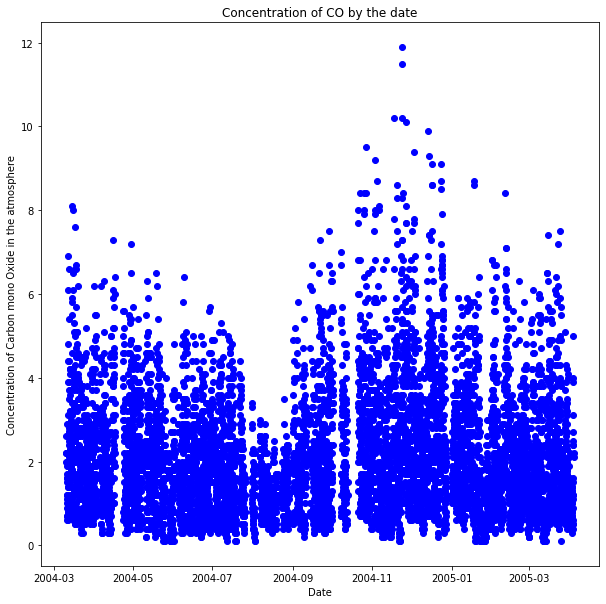

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['CO(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

In [23]:
print ("PT08.S1(CO) ",(df['PT08.S1(CO)']==-200).sum())
print("NMHC(GT) ",(df['NMHC(GT)']==-200).sum())
print("C6H6(GT) ",(df['C6H6(GT)']==-200).sum())
print("PT08.S2(NMHC)",(df['PT08.S2(NMHC)']==-200).sum())
print("NO2(GT)",(df['NO2(GT)']==-200).sum())
print("PT08.S4(NO2)",(df['PT08.S4(NO2)']==-200).sum())
print("PT08.S5(O3)",(df['PT08.S5(O3)']==-200).sum())
print("T",(df['T']==-200).sum())
print("RH",(df['RH']==-200).sum())
print("AH",(df['AH']==-200).sum())

PT08.S1(CO)  330
NMHC(GT)  6784
C6H6(GT)  330
PT08.S2(NMHC) 330
NO2(GT) 416
PT08.S4(NO2) 330
PT08.S5(O3) 330
T 330
RH 330
AH 330


In [24]:
del df['NMHC(GT)']
#Too many outlier values we will drop the whole column as there is no use fixing the outlier.

In [25]:
median=df.loc[df['PT08.S1(CO)']!=-200,'PT08.S1(CO)'].median()
df.loc[df['PT08.S1(CO)']==-200,'PT08.S1(CO)']=np.nan
df['PT08.S1(CO)'].fillna(median,inplace=True)
median

1075.0

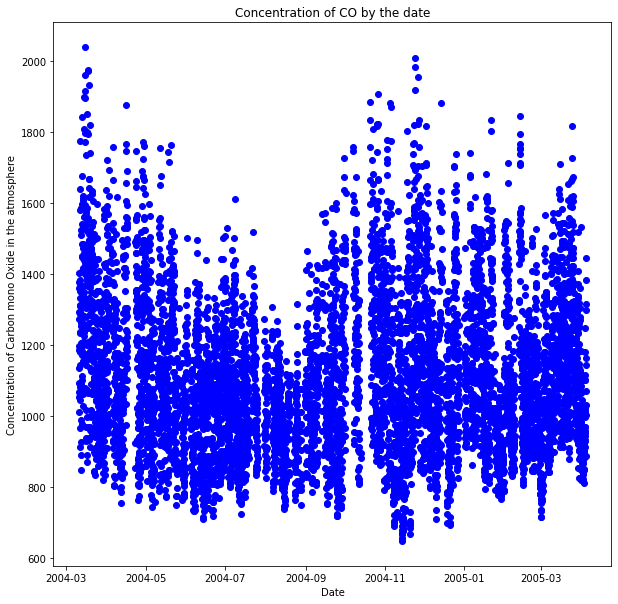

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['PT08.S1(CO)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

In [27]:
median=df.loc[df['C6H6(GT)']!=-200,'C6H6(GT)'].median()
df.loc[df['C6H6(GT)']==-200,'C6H6(GT)']=np.nan
df['C6H6(GT)'].fillna(median,inplace=True)
median

8.5

In [28]:
median=df.loc[df['PT08.S2(NMHC)']!=-200,'PT08.S2(NMHC)'].median()
df.loc[df['PT08.S2(NMHC)']==-200,'PT08.S2(NMHC)']=np.nan
df['PT08.S2(NMHC)'].fillna(median,inplace=True)
median

919.0

In [29]:
median=df.loc[df['NOx(GT)']!=-200,'NOx(GT)'].median()
df.loc[df['NOx(GT)']==-200,'NOx(GT)']=np.nan
df['NOx(GT)'].fillna(median,inplace=True)
median

188.0

In [30]:
median=df.loc[df['PT08.S3(NOx)']!=-200,'PT08.S3(NOx)'].median()
df.loc[df['PT08.S3(NOx)']==-200,'PT08.S3(NOx)']=np.nan
df['PT08.S3(NOx)'].fillna(median,inplace=True)
median

795.0

In [31]:
median=df.loc[df['NO2(GT)']!=-200,'NO2(GT)'].median()
df.loc[df['NO2(GT)']==-200,'NO2(GT)']=np.nan
df['NO2(GT)'].fillna(median,inplace=True)
median

110.0

In [32]:
median=df.loc[df['PT08.S4(NO2)']!=-200,'PT08.S4(NO2)'].median()
df.loc[df['PT08.S4(NO2)']==-200,'PT08.S4(NO2)']=np.nan
df['PT08.S4(NO2)'].fillna(median,inplace=True)
median

1447.0

In [33]:
median=df.loc[df['PT08.S5(O3)']!=-200,'PT08.S5(O3)'].median()
df.loc[df['PT08.S5(O3)']==-200,'PT08.S5(O3)']=np.nan
df['PT08.S5(O3)'].fillna(median,inplace=True)
median

990.0

In [34]:
mean=df.loc[df['T']!=-200,'T'].mean()
df.loc[df['T']==-200,'T']=np.nan
df['T'].fillna(mean,inplace=True)
mean

17.770424836601407

In [35]:
mean=df.loc[df['AH']!=-200,'AH'].mean()
df.loc[df['AH']==-200,'AH']=np.nan
df['AH'].fillna(mean,inplace=True)
mean

0.9894533088235242

In [36]:
mean=df.loc[df['RH']!=-200,'RH'].mean()
df.loc[df['RH']==-200,'RH']=np.nan
df['RH'].fillna(mean,inplace=True)
mean

49.06007625272324

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7674 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7674 non-null   datetime64[ns]
 1   Time           7674 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    7674 non-null   float64       
 4   C6H6(GT)       7674 non-null   float64       
 5   PT08.S2(NMHC)  7674 non-null   float64       
 6   NOx(GT)        7674 non-null   float64       
 7   PT08.S3(NOx)   7674 non-null   float64       
 8   NO2(GT)        7674 non-null   float64       
 9   PT08.S4(NO2)   7674 non-null   float64       
 10  PT08.S5(O3)    7674 non-null   float64       
 11  T              7674 non-null   float64       
 12  RH             7674 non-null   float64       
 13  AH             7674 non-null   float64       
 14  DateTime       7674 non-null   datetime64[ns]
dtypes: datetime64[ns](2),